In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline
from scipy import stats as ss


Описание данных

ad_id – идентификатор объявления (рекламы)

xyz_campaign_id – идентификатор рекламной кампании в базе компании X

fb_campaign_id – идентификатор кампании в Facebook

age – возрастная группа, которой показывалась реклама

gender – пол тех, кому показывалась реклама

interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес, условно: 1 – животные, 2 – автомобили, 3 – тортики и т.д.)

impressions – число показов

clicks – число кликов

spent – сумма, которую компания потратила на показ объявления 

total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы

approved_conversion – количество людей, которые купили продукт после просмотра рекламы

In [12]:
df = pd.read_csv('conversion.csv')
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2


1. Загрузите данные, проверьте число наблюдений и столбцов, 
типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

In [13]:
df.shape

(1143, 11)

In [14]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [15]:
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [16]:
df.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

2. Сколько уникальных рекламных кампаний было проведено? xyz_campaign_id

In [17]:
df.xyz_campaign_id.nunique()

3

3. Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление)
для каждой рекламной кампании в Facebook, прологарифмировав значения. Выберите верные утверждения:

Hint: np.log()

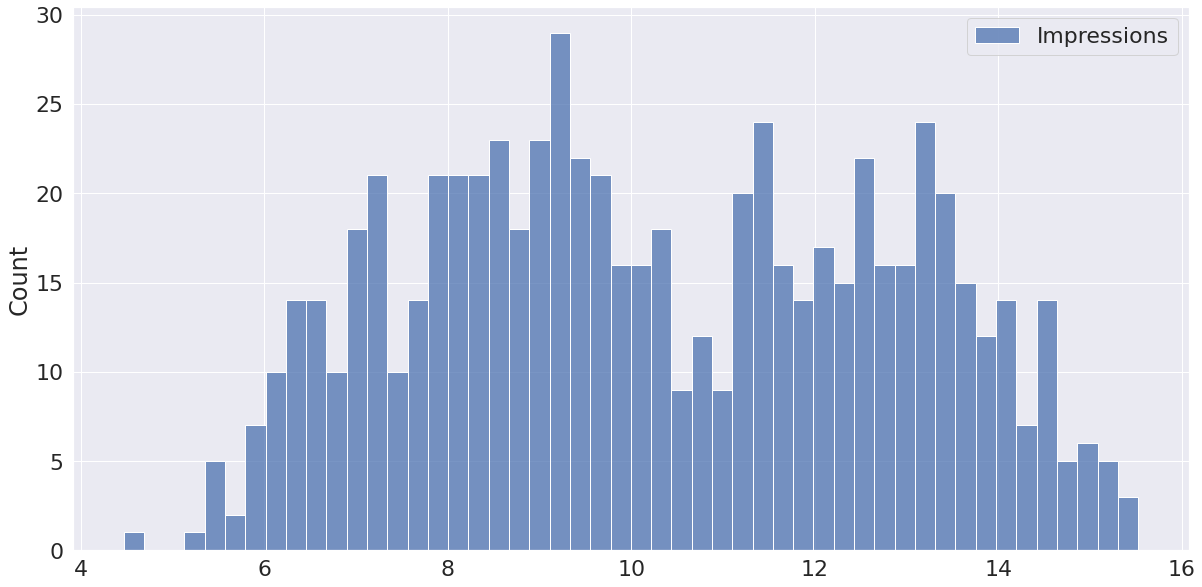

In [71]:
sns.histplot(np.log(df.groupby('fb_campaign_id').agg({'Impressions': 'sum'})), bins=50)

In [18]:
facebook = df.groupby('fb_campaign_id').agg({'Impressions': 'sum'}).reset_index()
facebook.Impressions = np.log(facebook.Impressions)
facebook

,fb_campaign_id,Impressions
0,103916,8.902456
1,103917,9.790375
2,103920,6.541030
3,103928,9.035034
4,103929,7.557473
...,...,...
686,179977,13.937527
687,179978,13.365386
688,179979,11.928546
689,179981,13.580108


In [20]:
??sns.barplot

In [31]:
# plt.figure(figsize=(16,16))
sns.set(
    font_scale=2,
    rc={'figure.figsize':(20,10)}
        )
bar.set_xticklabels(df.fb_campaign_id, fontsize=4, rotation=90);

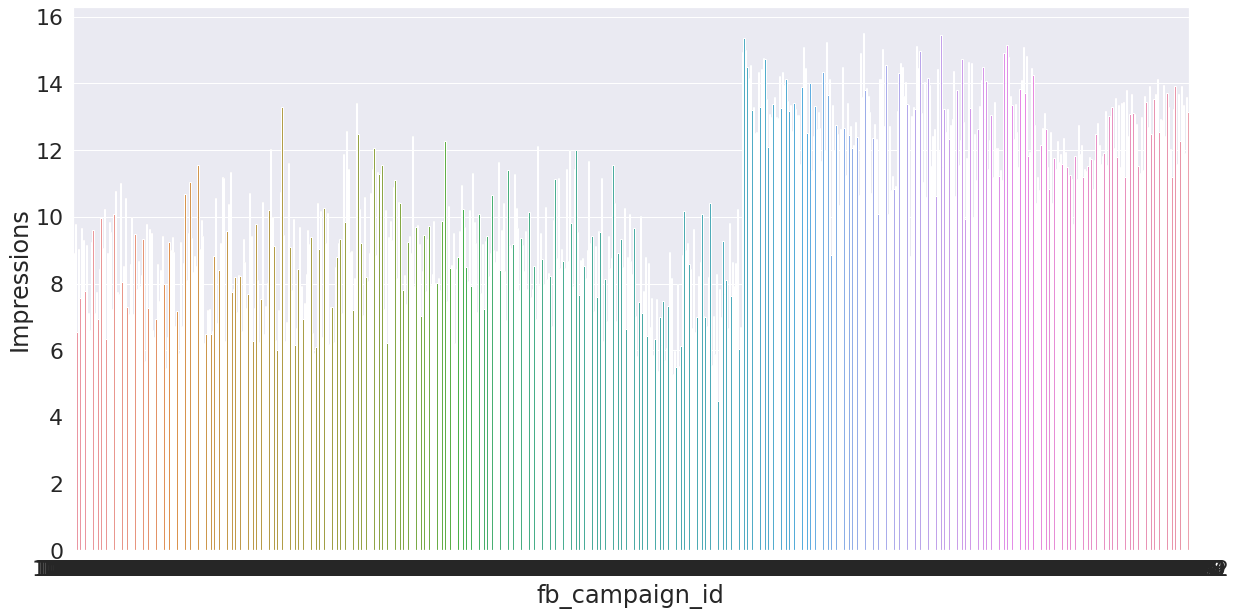

In [32]:
bar = sns.barplot(x='fb_campaign_id', y='Impressions', data=facebook)

4. Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность,
т.е. отношение числа кликов к количеству показов.

CTR= clicks/impressions

Создайте новую колонку, затем посмотрите на описательные статистики. 
В качестве ответа укажите ad_id объявления с наибольшим CTR.

In [36]:
df['CTR'] = df['Clicks']/df['Impressions']

In [39]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007,0.000164
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708,0.000115
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000,0.000100
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000,0.000160
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000,0.000234
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000,0.001059


In [46]:
df.sort_values('CTR', ascending=False).head(1)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059


5. Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). 
Какому графику соответствует распределение CTR кампании 916?

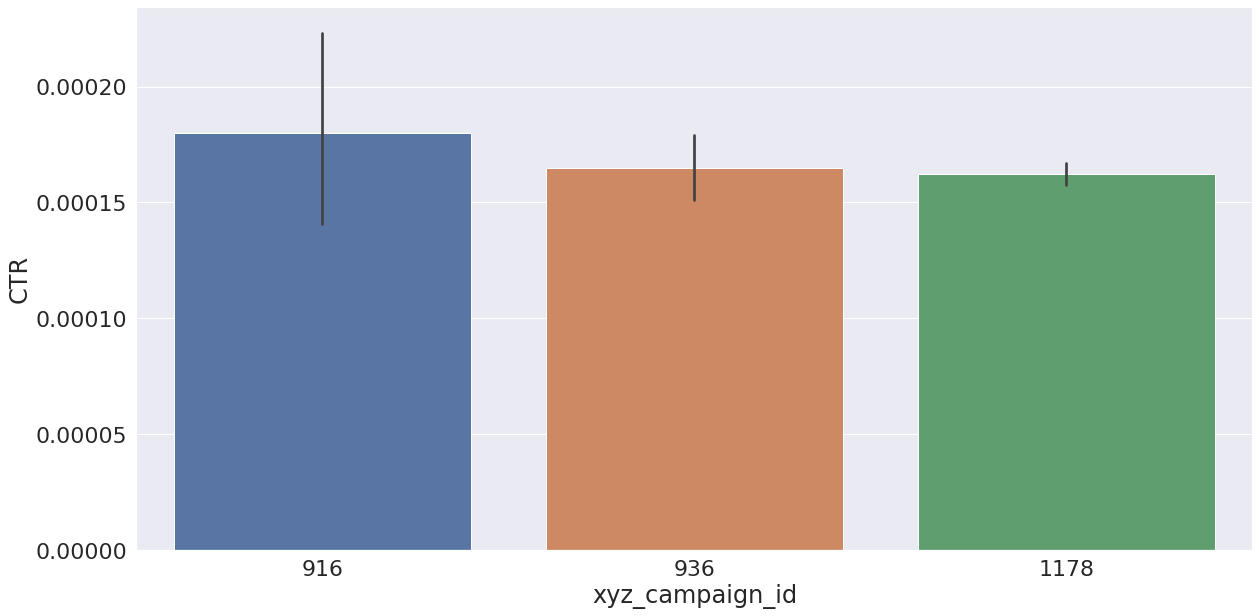

In [47]:
sns.barplot(x='xyz_campaign_id', y='CTR', data=df)

6. CPC (cost-per-click) – стоимость за клик пользователя по объявлению. 
Рассчитывается путём деления суммы потраченных денег на общее число кликов:

CPC= spent/clicks
 
Выведите описательные статистики для новой переменной, посмотрите на форму распределения. 
В ответе укажите межквартильный размах, округленный до двух знаков после точки.

Обратите внимание, что в столбце могут встретиться NaN. 
Если вы используете функцию iqr из scipy, то следует указать аргумент nan_policy='omit', 
чтобы их проигнорировать. При построении графика необходимо использовать метод .dropna().

In [49]:
df['CPC'] = df['Spent']/df['Clicks']
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


In [51]:
df.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

In [56]:
ss.iqr(df.CPC, nan_policy='omit')

0.25436369905

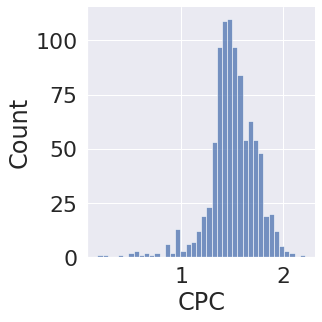

In [53]:
sns.displot(df.CPC.dropna())

7. Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. Какой график получился?

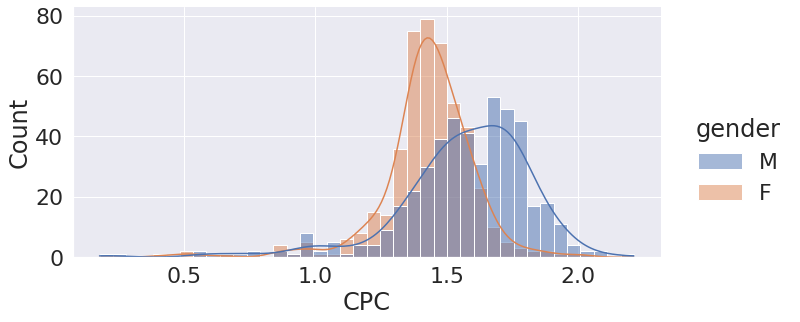

In [63]:
sns.displot(x=df.CPC.dropna(), hue=df.gender, kde=True, height=5, aspect=2)

8. Конверсия (conversion rate) – отношение числа пользователей, 
совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.

Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, 
округлив значение до 2 знаков после точки. Например, если значение кликов равно 10, а покупок – 2, 
то CR на данном этапе составляет 2/10=0.2=20.

Note: клики – Clicks, покупки – Approved_Conversion.

In [68]:
df['conversion rate'] = df['Approved_Conversion'] / df['Clicks']
df.loc[df['ad_id'] == 1121814]['conversion rate'].mul(100).round(2)

860    3.09
Name: conversion rate, dtype: float64